# Importing the Modules

In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns #importing seaborn module 
import warnings
from collections import Counter
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn import metrics
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import explained_variance_score, median_absolute_error, r2_score, mean_squared_error, accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split # Model evaluation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler # Preprocessing
from sklearn.linear_model import Lasso, Ridge, ElasticNet, RANSACRegressor, SGDRegressor, HuberRegressor, BayesianRidge # Linear models
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor  # Ensemble methods
from xgboost import XGBRegressor, plot_importance # XGBoost
from sklearn.svm import SVR, SVC, LinearSVC  # Support Vector Regression
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline # Streaming pipelines
from sklearn.decomposition import KernelPCA, PCA # Dimensionality reduction
from sklearn.feature_selection import SelectFromModel # Dimensionality reduction
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV # Model evaluation
from sklearn.base import clone # Clone estimator
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import xgboost as xgb
warnings.filterwarnings('ignore')

# Loading Data Set

In [24]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [25]:
submission = pd.DataFrame()
submission['Item_Identifier'] = test['Item_Identifier']
submission['Outlet_Identifier'] = test['Outlet_Identifier']

# Data Exploration

In [26]:
#First look at train
data.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3968,FDD26,NaN,Regular,0.071806,Canned,186.5924,OUT027,1985,Medium,Tier 3,Supermarket Type3,5182.5872
3964,NCW29,14.00,Low Fat,0.028981,Health and Hygiene,129.5310,OUT018,2009,Medium,Tier 3,Supermarket Type2,2077.2960
1749,FDJ55,12.80,Regular,0.023527,Meat,223.5404,OUT035,2004,Small,Tier 2,Supermarket Type1,5626.0100
6884,FDS11,7.05,Regular,0.055548,Breads,225.3088,OUT035,2004,Small,Tier 2,Supermarket Type1,5816.4288
4796,FDI20,NaN,LF,0.038377,Fruits and Vegetables,211.5586,OUT027,1985,Medium,Tier 3,Supermarket Type3,4432.2306


In [27]:
#First look at test
test.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4854,NCF18,NaN,Low Fat,0.155797,Household,191.3504,OUT019,1985,Small,Tier 1,Grocery Store
2244,NCO43,5.500,Low Fat,0.047171,Others,100.9016,OUT049,1999,Medium,Tier 1,Supermarket Type1
1954,FDQ55,13.650,Regular,0.013027,Fruits and Vegetables,116.7834,OUT013,1987,High,Tier 3,Supermarket Type1
1932,DRJ39,20.250,Low Fat,0.036383,Dairy,221.0482,OUT049,1999,Medium,Tier 1,Supermarket Type1
2460,FDM16,8.155,Regular,0.033527,Frozen Foods,74.0354,OUT013,1987,High,Tier 3,Supermarket Type1


In [28]:
#Shape of train and test
print('There are {} rows and {} columns in train'.format(data.shape[0],data.shape[1]))
print('There are {} rows and {} columns in train'.format(test.shape[0],test.shape[1]))

There are 8523 rows and 12 columns in train
There are 5681 rows and 11 columns in train


In [29]:
#Check Missing values in train
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [30]:
#Check Missing values in test
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [31]:
#check datatypes in train
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [32]:
#check datatypes in test
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [33]:
#Lets describe train
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [34]:
#Lets describe test
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [35]:
#Lets concatenate train & test
df=pd.concat([data,test])
df.shape 

(14204, 12)

In [36]:
#Lets convert Year from numerical to object type 
df['Outlet_Establishment_Year']  = df['Outlet_Establishment_Year'].astype('object')

In [37]:
df.Item_Identifier.nunique()

1559

There are 1559 unique values of Item_Identifier with max frequency of 10 and min is 7

### Identify categorical columns

In [38]:
df_cat=df.select_dtypes(include='object')
df_cat.drop(['Item_Identifier'],axis=1,inplace=True)
df_cat.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [39]:
#Identify numerical columns
df_num=df.select_dtypes(include=['int64','float64'])
list(df_num.columns)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

### Explore categorical variables - 'Item_Fat_Content', 'Outlet_Size' 

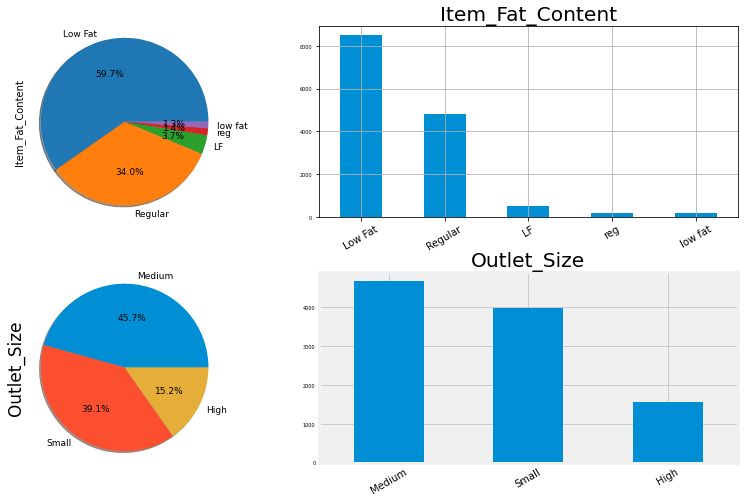

In [40]:
cat_col_1 = ['Item_Fat_Content', 'Outlet_Size']
count = 1
for cols in cat_col_1:
    plt.subplot(2, 2, count)
    df[cols].value_counts().plot.pie(shadow=True,autopct='%1.1f%%',radius=1.1,textprops={'fontsize': 9} )
    count +=1
    plt.subplot(2, 2, count)
    plt.tight_layout()
    plt.style.use('fivethirtyeight')
    df[cols].value_counts().plot.bar()
    fig=plt.gcf()
    fig.set_size_inches(12,7)
    plt.title('{0}'.format(cols))
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=5)
    plt.xticks(rotation=30)
    count+=1

Item fat content : Low Fat is having maximum (59.7%) count
    
outlet size : Medium size outlet (45.7%) is having max count

### Explore categorical variables - 

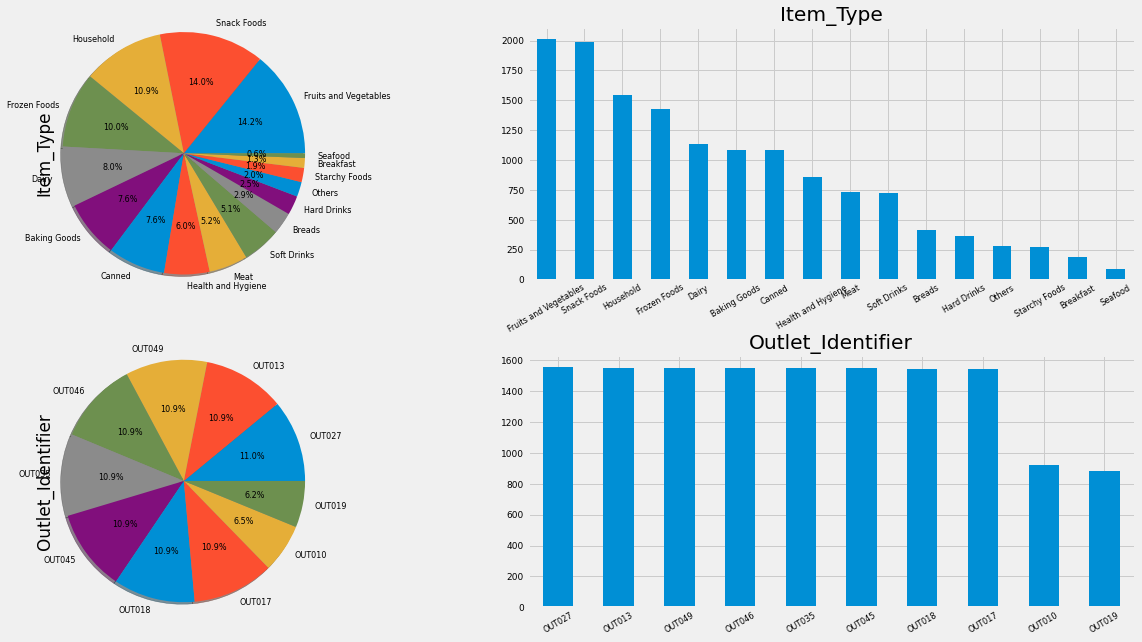

In [41]:
cat_col_1 = [ 'Item_Type', 'Outlet_Identifier']
count = 1
for cols in cat_col_1:
    plt.subplot(2, 2, count)
    df[cols].value_counts().plot.pie(shadow=True,autopct='%1.1f%%',radius=1.2,textprops={'fontsize': 8} )
    count +=1
    plt.subplot(2, 2, count)
    plt.tight_layout()
    plt.style.use('fivethirtyeight')
    df[cols].value_counts().plot.bar()
    fig=plt.gcf()
    fig.set_size_inches(18,9)
    plt.title('{0}'.format(cols))
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=9)
    plt.xticks(rotation=30)
    count+=1

Item type: Fruits and vegetables has max count of 2k and seafood is min
    
outlet identifier : outl027 is having max countand out019 is having min count

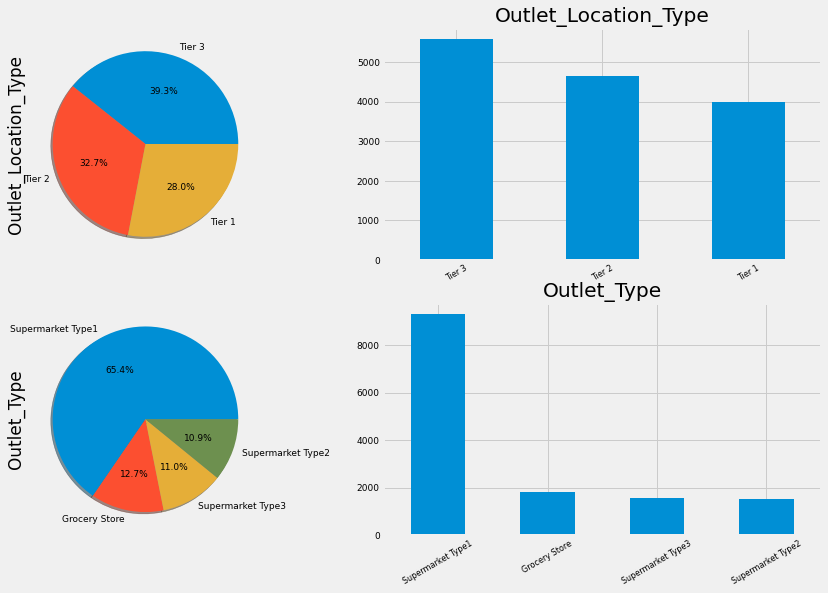

In [42]:
cat_col_1 = [ 'Outlet_Location_Type', 'Outlet_Type']
count = 1
for cols in cat_col_1:
    plt.subplot(2, 2, count)
    df[cols].value_counts().plot.pie(shadow=True,autopct='%1.1f%%',radius=1.0,textprops={'fontsize': 9} )
    count +=1
    plt.subplot(2, 2, count)
    plt.tight_layout()
    plt.style.use('fivethirtyeight')
    df[cols].value_counts().plot.bar()
    fig=plt.gcf()
    fig.set_size_inches(13,8)
    plt.title('{0}'.format(cols))
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=9)
    plt.xticks(rotation=30)
    count+=1


Outlet_Location_Type : Max count for Tier3 (39.3%) and Tier 1 is having lowest count
    
Outlet_Type : Supermarket Type1 has mx count (65.4%)

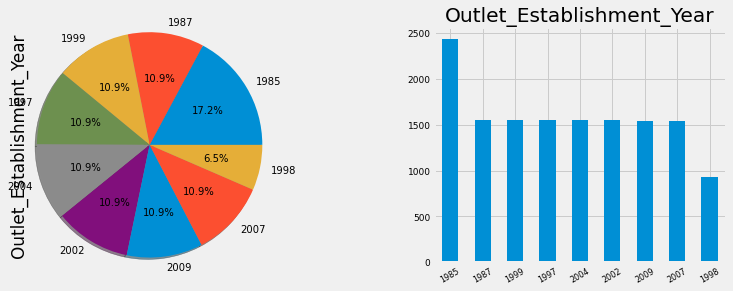

In [43]:
cat_col_1 = [ 'Outlet_Establishment_Year']
count = 1
for cols in cat_col_1:
    plt.subplot(1, 2, count)
    df[cols].value_counts().plot.pie(shadow=True,autopct='%1.1f%%',radius=1.2,textprops={'fontsize': 10} )
    count +=1
    plt.subplot(1, 2, count)
    plt.tight_layout()
    plt.style.use('fivethirtyeight')
    df[cols].value_counts().plot.bar()
    fig=plt.gcf()
    fig.set_size_inches(12,4)
    plt.title('{0}'.format(cols))
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=9)
    plt.xticks(rotation=30)
    count+=1

1985: Maximum count of 2300+ can be seen

1998 : Minimum count of 900 can be seen

All other years have same count which is surprising

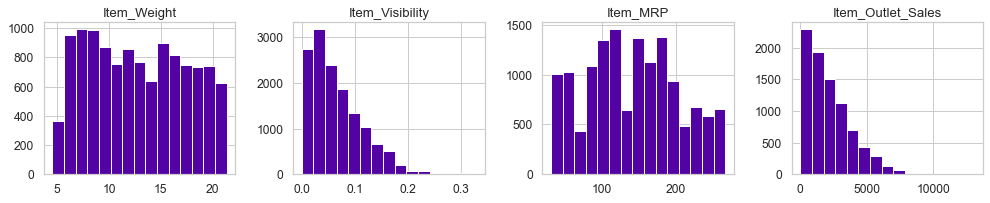

In [44]:
sns.set(style='whitegrid', palette="plasma", font_scale=1.1, rc={"figure.figsize": [8, 5]})
df[list(df_num.columns)].hist(bins=15, figsize=(15, 6), layout=(2, 4));

Item Weight : We can see maximum frequency between 6-20
    
Sales : Max occurances for sales value 0-2k, few sales can be seen around 9k as well
    
Item_MRP : Price frequency is max between 100-140 & 150-190
    
Item_Visibility : Maximum frequency between 0.01-.05

### Explore numeric variables - 

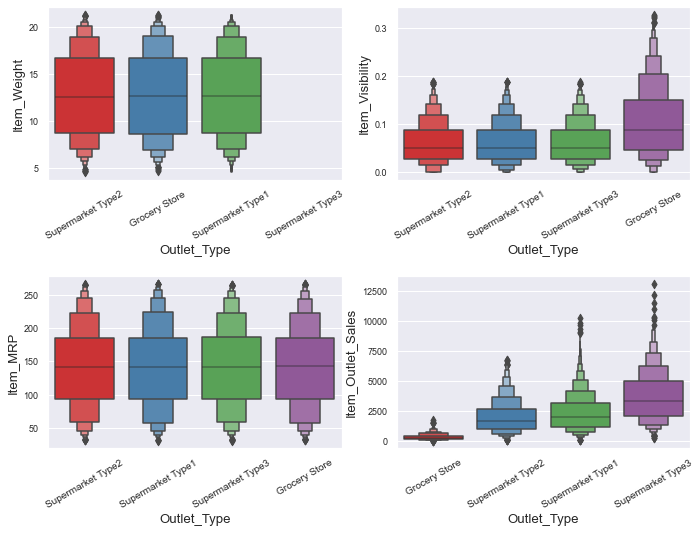

In [45]:
plt.figure(figsize=(10, 14))
count = 1
for cols in df_num:
    sns.set(style='darkgrid', palette="Set1", font_scale=1.1, rc={"figure.figsize": [8, 6]})
    plt.subplot(4, 2, count)
    plt.tight_layout()
    #sns.boxenplot(x='Outlet_Type', y= cols, data=data)
    sorted_nb = df.groupby(['Outlet_Type'])[cols].median().sort_values()
    sns.boxenplot(x=df['Outlet_Type'], y=df[cols], order=list(sorted_nb.index))
    plt.xticks(rotation=30)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=9)
    
    count+=1

Item weight : Its same across diff outlets. Item weight is missing for super mkt 3 and grocery as per below stats
    
Item_Visibility : Grocery stores have highest visibility, rest all super markets have same visibility
    
Item_MRP : MRP is same across all outlets which is obvious
    
Item_Outlet_Sales : Median Sales volume are highest at super mkt type 3 > super mkt 1 > super mkt 2 > grocery

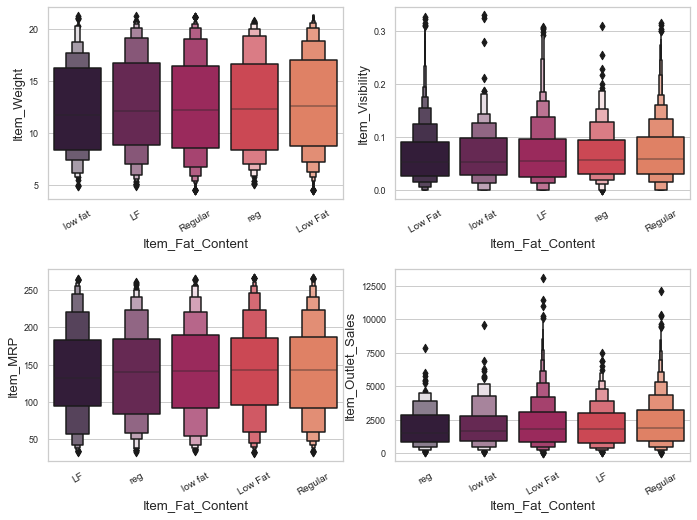

In [46]:
plt.figure(figsize=(10, 14))
count = 1
for cols in df_num:
    sns.set(style='whitegrid', palette="rocket", font_scale=1.1, rc={"figure.figsize": [8, 6]})
    plt.subplot(4, 2, count)
    plt.tight_layout()
    #sns.boxenplot(x='Outlet_Type', y= cols, data=data)
    sorted_nb = df.groupby(['Item_Fat_Content'])[cols].median().sort_values()
    sns.boxenplot(x=df['Item_Fat_Content'], y=df[cols], order=list(sorted_nb.index))
    plt.xticks(rotation=30)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=9)
    
    count+=1

Item weight : "low fat" is having min median item weight < LF < Regular < reg < Low Fat

Item_Visibility : same across all categories

Item_MRP : Lf < reg & low fat < Low Fat < Regular

Item_Outlet_Sales : Median Sales volume reg < low fat < Low Fat < LF < Regular (But not much variance among diff categories)

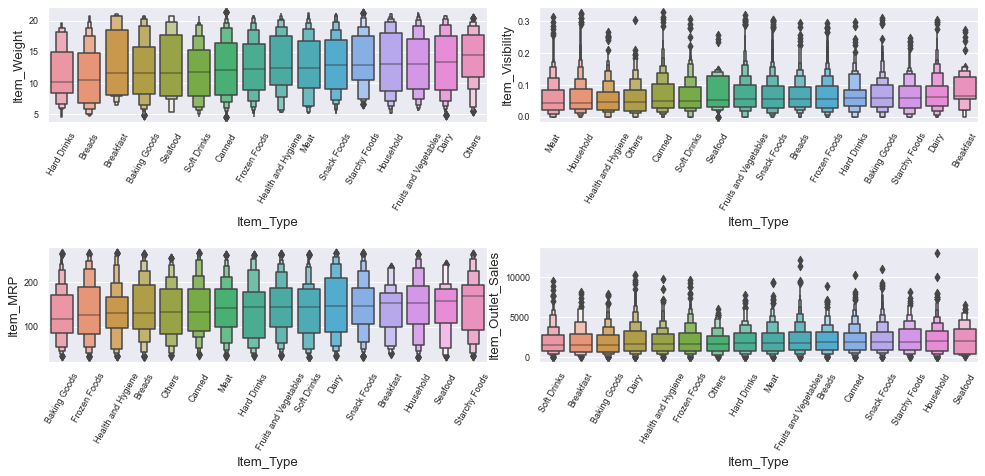

In [47]:
plt.figure(figsize=(14, 12))
count = 1
for cols in df_num:
    sns.set(style='darkgrid', palette="ocean", font_scale=1.1)
    plt.subplot(4, 2, count)
    plt.tight_layout()
    #sns.boxenplot(x='Outlet_Type', y= cols, data=data)
    sorted_nb = df.groupby(['Item_Type'])[cols].median().sort_values()
    sns.boxenplot(x=df['Item_Type'], y=df[cols], order=list(sorted_nb.index))
    plt.xticks(rotation=60)
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    
    count+=1

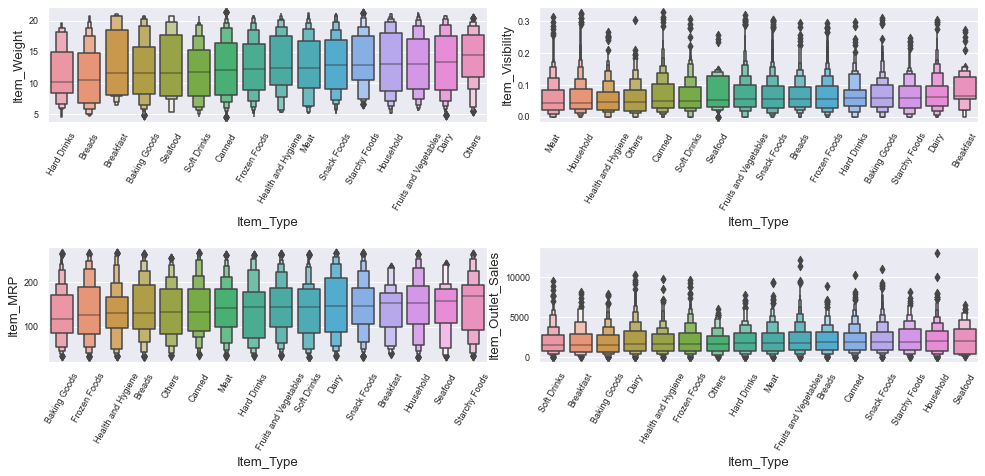

In [48]:
plt.figure(figsize=(14, 12))
count = 1
for cols in df_num:
    sns.set(style='darkgrid', palette="ocean", font_scale=1.1)
    plt.subplot(4, 2, count)
    plt.tight_layout()
    #sns.boxenplot(x='Outlet_Type', y= cols, data=data)
    sorted_nb = df.groupby(['Item_Type'])[cols].median().sort_values()
    sns.boxenplot(x=df['Item_Type'], y=df[cols], order=list(sorted_nb.index))
    plt.xticks(rotation=60)
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    
    count+=1

Item weight : hard drinks is having min median item weight & others having max median value
    
Item_Visibility : meat is lowest & breakfast is highest in median values
    
Item_MRP : baking goods is lowest and starchy foods is highest in median values
    
Item_Outlet_Sales : soft drinks have min median Vs sea food is having maximum median sales value

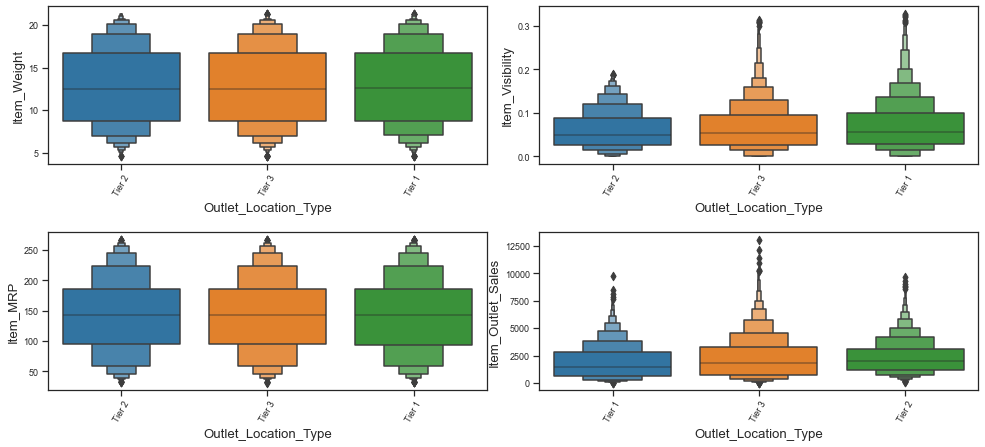

In [49]:
#Numerical Data ('Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales' Vs Outlet_Location_Type)
plt.figure(figsize=(14, 12))
count = 1
for cols in df_num:
    sns.set(style='ticks', palette="tab10", font_scale=1.1)
    plt.subplot(4, 2, count)
    plt.tight_layout()
    #sns.boxenplot(x='Outlet_Type', y= cols, data=data)
    sorted_nb = df.groupby(['Outlet_Location_Type'])[cols].median().sort_values()
    sns.boxenplot(x=df['Outlet_Location_Type'], y=df[cols], order=list(sorted_nb.index))
    plt.xticks(rotation=60)
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    
    count+=1

Item weight : same across all
    
Item_Visibility : Tier 2 < 3 & 1
    
Item_MRP : same across all
    
Item_Outlet_Sales : Tier 1 < 3 < 2 (i.e. Tier 2 generates highest sales median value)

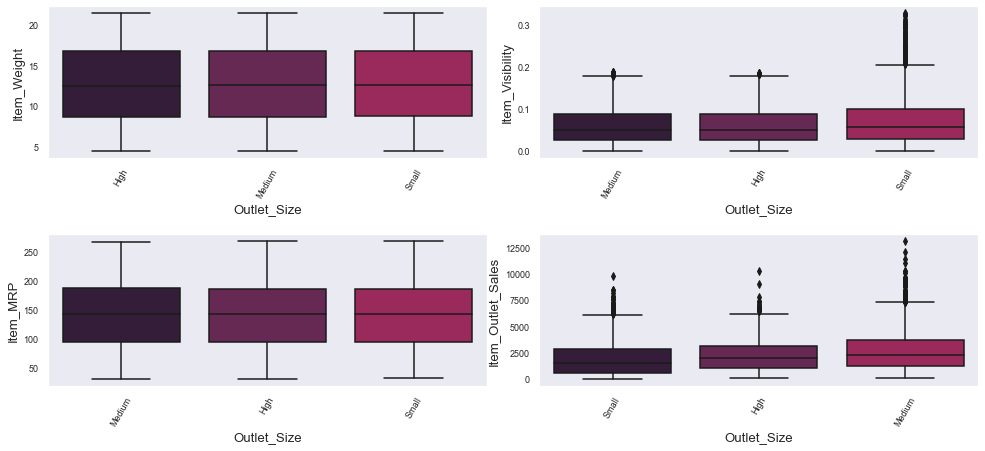

In [50]:
plt.figure(figsize=(14, 12))
count = 1
for cols in df_num:
    sns.set(style='dark', palette="rocket", font_scale=1.1)
    plt.subplot(4, 2, count)
    plt.tight_layout()
    #sns.boxenplot(x='Outlet_Type', y= cols, data=data)
    sorted_nb = df.groupby(['Outlet_Size'])[cols].median().sort_values()
    sns.boxplot(x=df['Outlet_Size'], y=df[cols], order=list(sorted_nb.index))
    plt.xticks(rotation=60)
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    
    count+=1

Item weight : same across all
    
Item_Visibility : medium < high & small
    
Item_MRP : same across all
    
Item_Outlet_Sales : small < high < medium (i.e. medium generates highest sales median value)

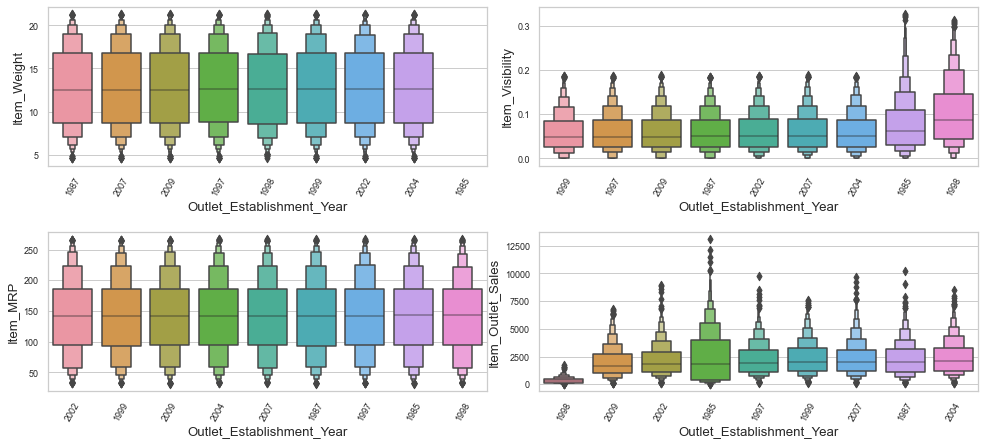

In [51]:
plt.figure(figsize=(14, 12))
count = 1
for cols in df_num:
    sns.set(style='whitegrid', palette="rocket", font_scale=1.1)
    plt.subplot(4, 2, count)
    plt.tight_layout()
    #sns.boxenplot(x='Outlet_Type', y= cols, data=data)
    sorted_nb = df.groupby(['Outlet_Establishment_Year'])[cols].median().sort_values()
    sns.boxenplot(x=df['Outlet_Establishment_Year'], y=df[cols], order=list(sorted_nb.index))
    plt.xticks(rotation=60)
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    
    count+=1

Item weight : same across all (1985 has misising data)
    
Item_Visibility : 1999 had lowest Vs 1998 had highest
    
Item_MRP : almost same across all
    
Item_Outlet_Sales : 1998 had lowest sales Vs 1987&2004 had highest (i.e. 1987 & 2004 generates highest sales median value)

### Multivariate Analysis

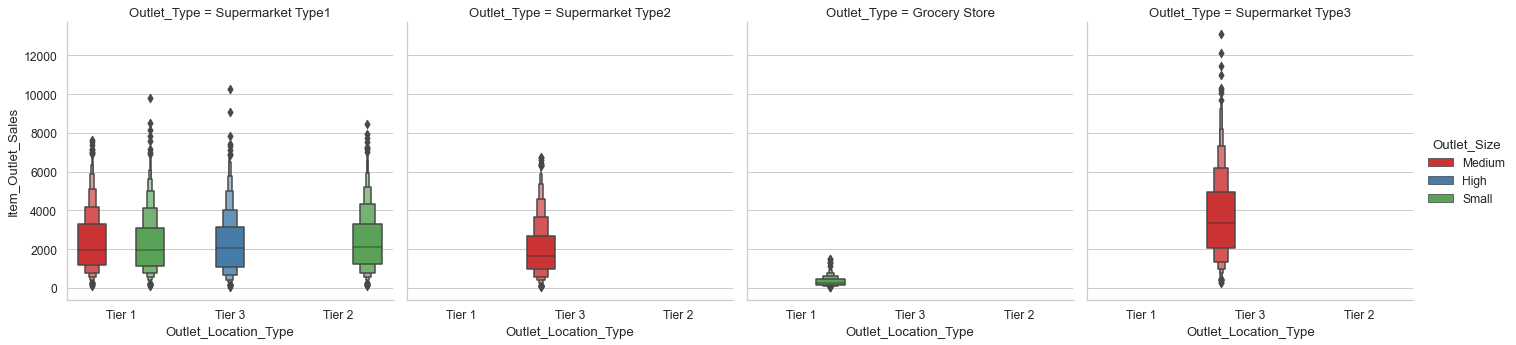

In [52]:
#Variable - Outlet_Type Vs Item_Outlet_Sales
#Catplot
sns.catplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',kind='boxen',data=df,col='Outlet_Type',hue='Outlet_Size',palette="Set1")

Tier 3 in type super mkt 3 is having highest median sales

### Imputing missing values

#### 1. Item Weight

In [53]:
#Item Weight - Item weight should depend upon the item type and Item_Fat_Content a per above numerical analysis with boxenplots
Item_Weight_group = df.groupby(["Item_Type","Item_Fat_Content"])["Item_Weight"]

#printing the variabe that we created by median
print(Item_Weight_group.median())

df = df.reset_index()

Item_Type      Item_Fat_Content
Baking Goods   LF                  11.6500
               Low Fat             12.3000
               Regular             10.5000
               low fat              8.8275
               reg                 12.5000
                                    ...   
Starchy Foods  LF                  12.6750
               Low Fat             14.0000
               Regular             13.5000
               low fat             10.7925
               reg                 11.8475
Name: Item_Weight, Length: 70, dtype: float64


In [54]:
df.loc[df.Item_Weight.isnull(), 'Item_Weight'] = df.groupby(['Item_Type','Item_Fat_Content']).Item_Weight.transform('median')

In [55]:
# printing the total of nulls in Item_Weight Feature
print(df["Item_Weight"].isnull().sum())

0


#### 2. Outlet_Size

In [56]:
#Identify outlet type & Outlet_Location_Type for missing Outlet_Type
print(df[df.Outlet_Type.isnull()].Outlet_Size.value_counts())

Series([], Name: Outlet_Size, dtype: int64)


In [57]:
df.loc[df.Outlet_Size.isnull(),['Outlet_Type','Outlet_Location_Type']].sample(5)

,Outlet_Type,Outlet_Location_Type
8767,Grocery Store,Tier 3
4178,Supermarket Type1,Tier 2
10776,Supermarket Type1,Tier 2
6959,Supermarket Type1,Tier 2
12953,Supermarket Type1,Tier 2


Imputing missing values for Outlet Size :
    
There are three types of outlet sizes : small/medium/large
    
The mussing values exist for the below combination of outlet type & outlet location type

        a. Grocery & Tier 3
        b. Super market 1 & Tier 2
        
As per the above boxen plot we can see that for

        a. outlet type = grocery generally the outlet size is small
        b. outlet type = super market generally the outlet size is small & medium.
        
Hence I decided to imput small value for all missing values of Outlet Size

In [58]:
df['Outlet_Size'].fillna('Small', inplace=True)

In [59]:
df.isnull().sum()

index                           0
Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

All null values are imputed and data is ready for modelling

# Model Building

In [60]:
#Reset index
df.drop('index', axis = 1, inplace = True)
#Drop non-imp columns
df.drop('Item_Identifier', axis = 1, inplace = True)

In [61]:
#Converting categorocal variables to dummy variables 
df=pd.get_dummies(df,drop_first=True)

# Segregating train and test from df
train=df[:data.shape[0]]
test1=df[data.shape[0]:]

In [63]:
#Shape of train and test
print('There are {} rows and {} columns in train'.format(train.shape[0],train.shape[1]))
print('There are {} rows and {} columns in test'.format(test1.shape[0],test1.shape[1]))

There are 8523 rows and 47 columns in train
There are 5681 rows and 47 columns in test


In [64]:
train.drop('Item_Outlet_Sales', axis = 1, inplace = True)
test1.drop('Item_Outlet_Sales', axis = 1, inplace = True)

In [65]:
validation_size = 0.20
seed = 7

### Train Test Split

In [66]:
# Split-out validation dataset
X_train, X_validation, Y_train, Y_validation = train_test_split(train.values, data['Item_Outlet_Sales'].values, test_size=validation_size, random_state=seed)

### Standard Scaling

In [67]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([80,82,84,85,90,91,92,94,95,150,200]))

After trying out many models, I decided to use GBM to predict, as it was showing lowest RMSE

### Use GridSearchCV to find best estimator & RMS (root mean square)to calculate score

In [69]:
num_folds = 10
RMS = 'neg_mean_squared_error'
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=RMS, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [70]:
grid_result

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=GradientBoostingRegressor(random_state=7),
             param_grid={'n_estimators': array([ 80,  82,  84,  85,  90,  91,  92,  94,  95, 150, 200])},
             scoring='neg_mean_squared_error')

In [71]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -1145952.636138 using {'n_estimators': 80}
-1145952.636138 (87196.552198) with: {'n_estimators': 80}
-1146167.771212 (87382.411402) with: {'n_estimators': 82}
-1146263.057310 (87326.821851) with: {'n_estimators': 84}
-1146055.714907 (87343.155157) with: {'n_estimators': 85}
-1146033.327582 (87492.220740) with: {'n_estimators': 90}
-1146382.864668 (87443.379828) with: {'n_estimators': 91}
-1146496.228471 (87575.763060) with: {'n_estimators': 92}
-1146191.395204 (87038.709009) with: {'n_estimators': 94}
-1146222.802039 (86835.344335) with: {'n_estimators': 95}
-1155894.297273 (87875.933980) with: {'n_estimators': 150}
-1165209.434552 (88877.872016) with: {'n_estimators': 200}


Make predictions on validation dataset using best estimstor = 80

### Model Preparation

In [72]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=80, random_state=30)
model.fit(rescaledX, Y_train)
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print("RMSE = ", mean_squared_error(Y_validation, predictions))

RMSE =  1298301.0548520975


# Submission file Preparation

In [73]:
#Stanrdard scaling of the test dataset
rescaled_test1 = scaler.transform(test1)

In [74]:
#Predict on the test dataset
predicted_prices = model.predict(rescaled_test1)

In [75]:
#PRepare submission file
submission['Item_Outlet_Sales'] = predicted_prices
submission.to_csv('Sample_submission.csv',index=False)
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1673.162766
1,FDW14,OUT017,1365.152005
2,NCN55,OUT010,670.469889
3,FDQ58,OUT017,2492.056451
4,FDY38,OUT027,6043.182069
